In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

In [21]:
# Functions

## given two curve a, b, then return the inversection point of two curves
def FindTheBuyPoint(a, b):
    buyPoint = np.argwhere(np.diff(np.sign(a - b)) > 0).reshape(-1) + 0
    return buyPoint

def FindTheSellPoint(a, b):
    sellPoint = np.argwhere(np.diff(np.sign(a - b)) < 0).reshape(-1) + 0
    return sellPoint

def GetDataFromDB(ip, userName, psw, tableName, sql):
    try:
        db = pymysql.connect(ip, userName, psw, tableName)
    except:
        print ("Error: unable to connect to DB")
        
    #create a cursor
    cursor = db.cursor()

    try:
        cursor.execute(sql)
        results = cursor.fetchall()
    except:
        print ("Error: unable to fetch data from DB")
    
    db.close()
    
    return results

def SMA(data, period):
    if (type(data) == pd.core.series.Series):
        return data.rolling(window = period).mean()
    else:
        print ("Error: Wrong input, SMA(pandas.core.series.Series, integer)")
        
def EMA(data, period):
    if (type(data) == pd.core.series.Series):
        return data.ewm(span = period, adjust = False).mean()
    else:
        print ("Error: Wrong input, SMA(pandas.core.series.Series, integer)")

In [22]:
#get the close price from DB

try:
    sql = "SELECT LAST, DATE FROM btc_usd ORDER BY DATE"
    results = GetDataFromDB("140.118.126.136", "123", "1234567890", "test", sql)
    
    Dates = []
    ClosePrices = []
    for i in range(len(results)):
        Dates.append(results[i][1])
        ClosePrices.append(results[i][0])
    
    closePriceData = {
        'Date' : Dates,
        'Close' : ClosePrices
    }

    dfs_close = pd.DataFrame(closePriceData)

except:
    print ("Error: unable to fetch data from DB")

In [23]:
# sma
sma5_close = SMA(dfs_close['Close'], 5)
sma20_close = SMA(dfs_close['Close'], 20)
sma100_close = SMA(dfs_close['Close'], 100)

In [28]:
# ema
ema12_close = EMA(dfs_close['Close'], 12)
ema26_close = EMA(dfs_close['Close'], 26)

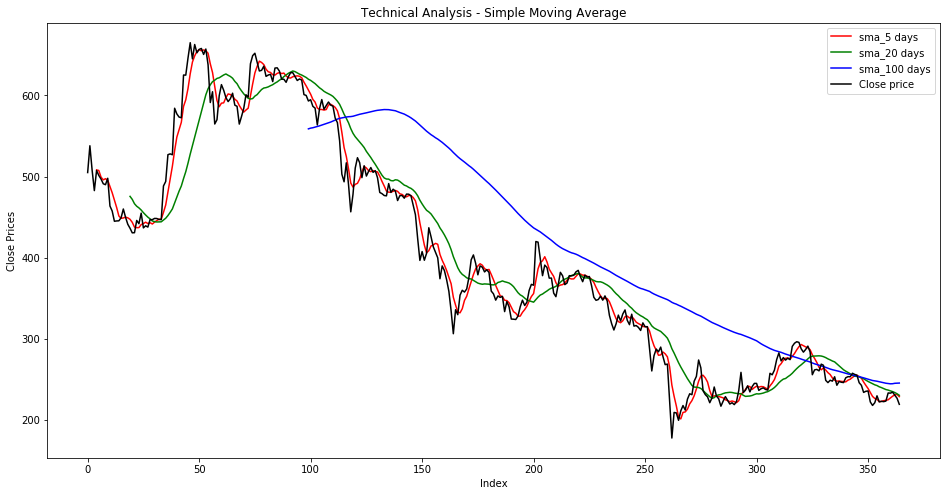

In [6]:
# Draw SMA curve
totalDate = 365
plt.figure(figsize = (16, 8))

x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

## draw sma5
sma5c = [sma5_close[i] for i in range(len(sma5_close.head(totalDate)))]
plt.plot(x, sma5c, 'r', label = 'sma_5 days')

## draw sma20
sma20c = [sma20_close[i] for i in range(len(sma20_close.head(totalDate)))]
plt.plot(x, sma20c, 'g', label = 'sma_20 days')

## draw sma100
sma100c = [sma100_close[i] for i in range(len(sma100_close.head(totalDate)))]
plt.plot(x, sma100c, 'b', label = 'sma_100 days')

## draw all close prices
plt.plot(x, dfs_close['Close'].head(totalDate), label = 'Close price', color = 'k')

## draw the intersection points of three curves
# FindTheIntersection(sma5c, sma20c)

#p#icture setting
plt.xlabel("Index")
plt.ylabel("Close Prices")
plt.title("Technical Analysis - Simple Moving Average")
plt.legend(loc = 'upper right')

##show picture
plt.show()

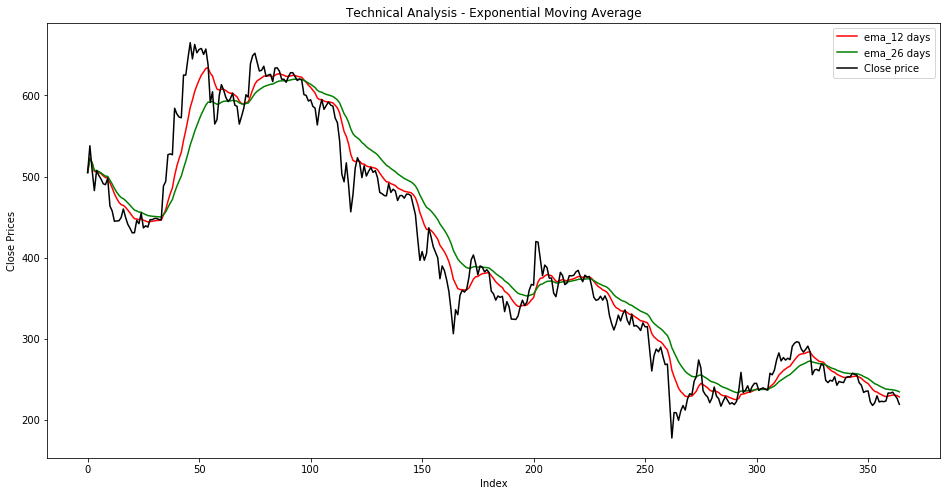

In [7]:
# Draw EMA curve
totalDate = 365
plt.figure(figsize = (16, 8))

x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

##draw ema12
ema12c = [ema12_close[i] for i in range(len(ema12_close.head(totalDate)))]
plt.plot(x, ema12c, 'r', label = 'ema_12 days')

##draw ema26
ema26c = [ema26_close[i] for i in range(len(ema26_close.head(totalDate)))]
plt.plot(x, ema26c, 'g', label = 'ema_26 days')

##draw all close prices
plt.plot(x, dfs_close['Close'].head(totalDate), label = 'Close price', color = 'k')

#p#icture setting
plt.xlabel("Index")
plt.ylabel("Close Prices")
plt.title("Technical Analysis - Exponential Moving Average")
plt.legend(loc = 'upper right')

##show picture
plt.show()

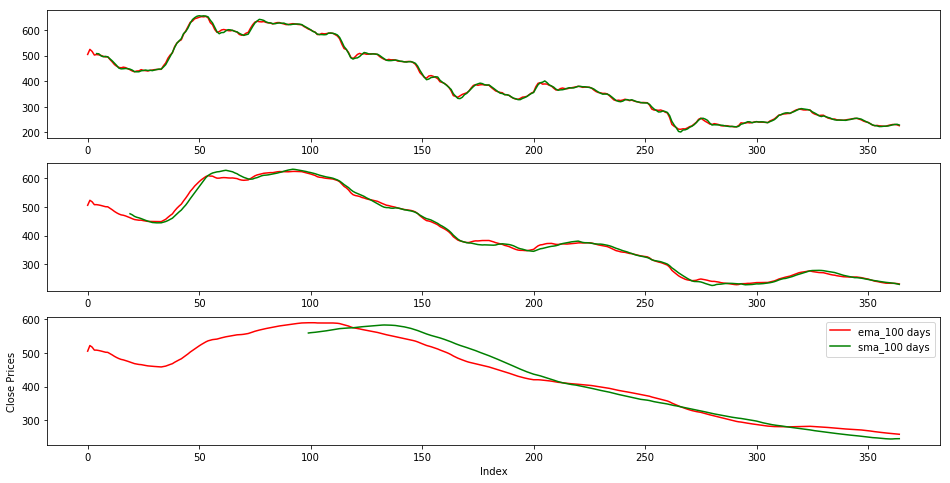

In [8]:
##compare EMA & SMA

# Draw EMA curve
totalDate = 365
plt.figure(figsize = (16, 8))
plt.subplot(3,1,1)
x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

##draw ema5
ema5_close = dfs_close['Close'].ewm(span = 5).mean()
ema5c = [ema5_close[i] for i in range(len(ema5_close.head(totalDate)))]
plt.plot(x, ema5c, 'r', label = 'ema_5 days')

##draw sma5
plt.plot(x, sma5c, 'g', label = 'sma_5 days')

plt.subplot(3,1,2)

##draw ema20
ema20_close = dfs_close['Close'].ewm(span = 20).mean()
ema20c = [ema20_close[i] for i in range(len(ema20_close.head(totalDate)))]
plt.plot(x, ema20c, 'r', label = 'ema_20 days')

##draw sma20
plt.plot(x, sma20c, 'g', label = 'sma_20 days')

plt.subplot(3,1,3)

##draw ema100
ema100_close = dfs_close['Close'].ewm(span = 100).mean()
ema100c = [ema100_close[i] for i in range(len(ema100_close.head(totalDate)))]
plt.plot(x, ema100c, 'r', label = 'ema_100 days')

##draw sma100
plt.plot(x, sma100c, 'g', label = 'sma_100 days')

#picture setting
plt.xlabel("Index")
plt.ylabel("Close Prices")
plt.legend(loc = 'upper right')

##show picture
plt.show()

In [9]:
# get the High & Low Price from DB

#try to search all close prices in DB, and change the type to list
sql = "SELECT HIGH, LOW, DATE FROM btc_usd ORDER BY DATE"

try:
    results = GetDataFromDB("140.118.126.136", "123", "1234567890", "test", sql)
    
    Dates = []
    HighPrices = []
    LowPrices = []
    for i in range(len(results)):
        Dates.append(results[i][2])
        HighPrices.append(results[i][0])
        LowPrices.append(results[i][1])
    
    PriceData = {
        'Date' : Dates,
        'High' : HighPrices,
        'Low' : LowPrices
    }
except:
    print ("Error: unable to fetch data from DB")
    
dfs_HL = pd.DataFrame(PriceData)

In [10]:
# KD
dfs_HL['RSV'] = 100 * (( dfs_close['Close'] - dfs_HL['Low'].rolling(window = 9).min()) / (dfs_HL['High'].rolling(window = 9).max() - dfs_HL['Low'].rolling(window = 9).min()))

dfs_HL['RSV'].fillna(method = 'bfill', inplace = True)

data = {
    'K9':[17],
    'D9':[39]
}

#calculate everyday's KD
for i in range(1, len(dfs_HL.index)):
    K9_value = (1.0/3.0) * dfs_HL['RSV'][i] + (2.0 / 3.0) * data['K9'][i - 1]
    data['K9'].append(K9_value)
    D9_value = (2.0/3.0) * data['D9'][i - 1] + (1.0 / 3.0) * data['K9'][i]
    data['D9'].append(D9_value)
    
dfs_KD = pd.DataFrame(data)

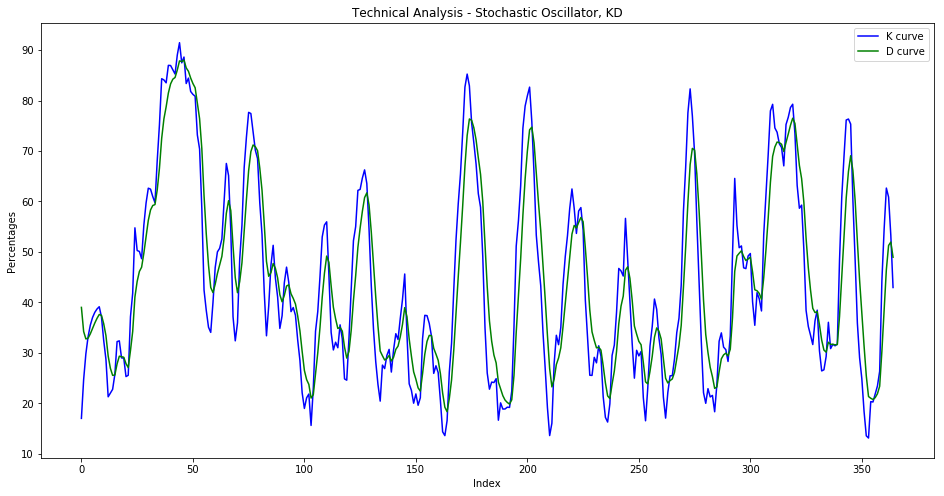

In [11]:
# Draw the KD Curve
totalDate = 365
plt.figure(figsize = (16, 8))

x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

## Draw K curve
Kc = [dfs_KD['K9'][i] for i in range(len(dfs_KD['K9'].head(totalDate)))]
plt.plot(x, Kc, 'b', label = 'K curve')

## Draw D curve
Dc = [dfs_KD['D9'][i] for i in range(len(dfs_KD['D9'].head(totalDate)))]
plt.plot(x, Dc, 'G', label = 'D curve')

##draw all intersection point of two curves
#buyPoint = FindTheBuyPoint(Dc, Kc)
#sellPoint = FindTheSellPoint(Dc, Kc)

#p#icture setting
plt.xlabel("Index")
plt.ylabel("Percentages")
plt.title("Technical Analysis - Stochastic Oscillator, KD")
plt.legend(loc = 'upper right')

##show picture
plt.show()

In [12]:
# RSI
period = 14
delta = dfs_close['Close'].diff()

up, down = delta.copy(), delta.copy()

up[up < 0] = 0
down[down > 0] = 0

rUp = up.rolling(window = period).sum() / period
rDown = down.rolling(window = period).sum() / period * -1

rsi2 = 100 * (rUp / (rUp + rDown))
rsi1 = rsi2.fillna(0)
#rsi2

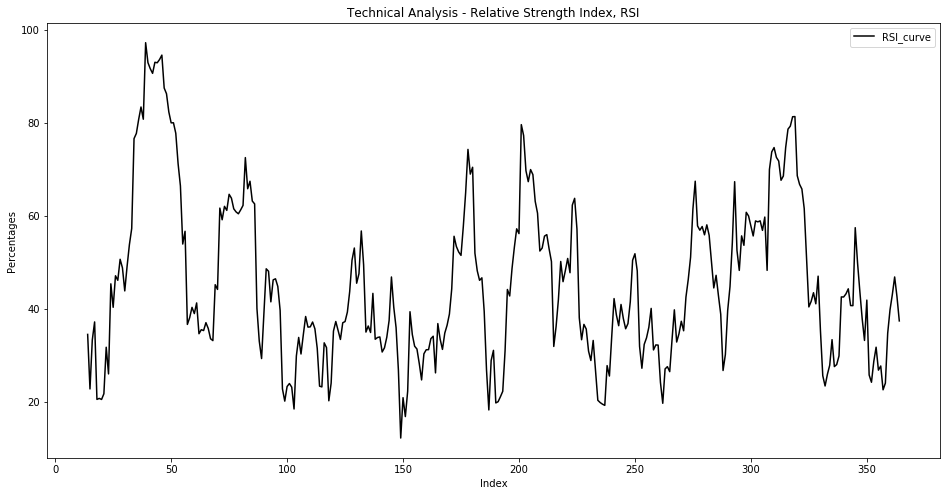

In [13]:
# Draw RSI curve
totalDate = 365
plt.figure(figsize = (16, 8))

x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

## Draw rsi curve
rsic = plt.plot(x, rsi2.head(totalDate), 'k', label = 'RSI_curve')

#p#icture setting
plt.xlabel("Index")
plt.ylabel("Percentages")
plt.title("Technical Analysis - Relative Strength Index, RSI")
plt.legend(loc = 'upper right')

##show picture
plt.show()

In [14]:
# MACD
dif = ema12_close - ema26_close
dem = dif.ewm(span = 9).mean()

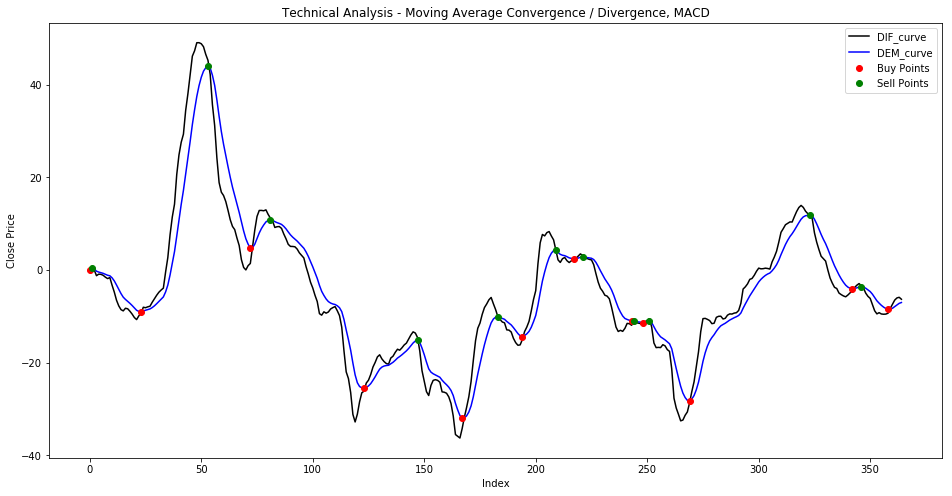

In [15]:
# draw MACD Curve
totalDate = 365
plt.figure(figsize = (16, 8))

x = [i for i in range(len(dfs_close.head(totalDate)))]
#x = list(dfs['Date'].head(totalDate))

## Draw DIF curve
difc = plt.plot(x, dif.head(totalDate), 'k', label = 'DIF_curve')

## Draw DEM curve
demc = plt.plot(x, dem.head(totalDate), 'b', label = 'DEM_curve')

## Draw the intersection points of two curves
buyPoint = FindTheBuyPoint(dif.head(totalDate), dem.head(totalDate))
sellPoint = FindTheSellPoint(dif.head(totalDate), dem.head(totalDate))
buyPoints = [buyPoint[i] for i in range(len(buyPoint))]
sellPoints = [sellPoint[i] for i in range(len(sellPoint))]

plt.plot(buyPoints, dem[buyPoints], "ro", label = "Buy Points")
plt.plot(sellPoints, dem[sellPoints], "go", label = "Sell Points")

#picture setting
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.title("Technical Analysis - Moving Average Convergence / Divergence, MACD")
plt.legend(loc = 'upper right')

##show picture
plt.show()

In [18]:
# get stock data to test the indicators
stockData_1101 = pd.read_csv(r"C:\Users\user\Desktop\1101.csv")
result = pd.DataFrame(stockData_1101)
result = result.reindex(index = result.index[::-1])
result = result.reset_index()
result = result.drop(columns = ['index'])

period = 6
delta = result['Close'].diff()
up, down = delta.copy(), delta.copy()

up[up < 0] = 0
down[down > 0] = 0

rUp = up.rolling(window = period).mean()
rUp.fillna(method = 'bfill', inplace = True)
for i in range(1,len(rUp)):
    rUp[i] = rUp[i-1] + (rUp[i] - rUp[i-1]) / period


rDown = down.rolling(window = period).mean() * (-1)
rDown.fillna(method = 'bfill', inplace = True)
for i in range(1,len(rUp)):
    rDown[i] = rDown[i-1] + (rDown[i] - rDown[i - 1]) / period


rsi2 = 100 * (rUp / (rUp + rDown))
rsi1 = rsi2.fillna(0)
#print (rsi1)

#rsi 不太準
#拿多一點data 跑看看會不會收斂到正確的

In [17]:
ema12 = result['Close'].ewm(span = 12, adjust = False).mean()
ema26 = result['Close'].ewm(span = 26, adjust = False).mean()


dif = ema12 - ema26
dem = dif.ewm(span = 9, adjust = False).mean()
dic = {
    'dem': dem,
    'dif': dif
}

print (pd.DataFrame(dic))
#ema不太準
#抓多點資料看會不會收斂到正確值

         dem       dif
0   0.000000  0.000000
1   0.000000  0.000000
2   0.009573  0.047863
3   0.040576  0.164590
4   0.087283  0.274109
5   0.137994  0.340837
6   0.188241  0.389232
7   0.239124  0.442656
8   0.288789  0.487445
9   0.347191  0.580799
10  0.404824  0.635355
11  0.459626  0.678835
12  0.523093  0.776959
13  0.589066  0.852960
14  0.654203  0.914751
15  0.698753  0.876954
16  0.728068  0.845325
17  0.748625  0.830854
18  0.764898  0.829990
19  0.782271  0.851764
20  0.787270  0.807265
21  0.783254  0.767190
22  0.771215  0.723061
23  0.744247  0.636372
24  0.707638  0.561201
25  0.670079  0.519843
26  0.641939  0.529379
27  0.615726  0.510874
28  0.589894  0.486565
29  0.560321  0.442032
30  0.532667  0.422047
31  0.506449  0.401580
32  0.479758  0.372991
33  0.416379  0.162865
34  0.346739  0.068176
35  0.281617  0.021132
36  0.203753 -0.107704
37  0.127103 -0.179496
38  0.074886 -0.133983
39  0.029381 -0.152638
40 -0.004014 -0.137594
41 -0.032845 -0.148172
42 -0.05005